# Customer churn prediction
Customer churn is the percentage of customers that stopped using the  company's product or service during a certain time frame.
In telecom industry  customer can choose from various service providers and switch to them.
Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


In [91]:
#importing all library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Reading the data

In [92]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
#To see if there is any Nan value.
np.isnan(df.all())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [94]:
#Filling the nan values with mean
df.fillna(df.mean(), inplace=True)


In [95]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [96]:
# Counting if there is any null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

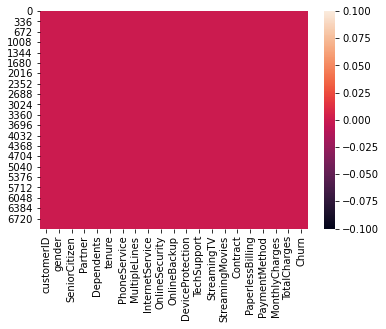

In [97]:
#Visulaizing the null values
sns.heatmap(df.isnull())

In [98]:
#Stastical information of the dat
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# Exploratory data analysis

# Univariate , Bivariate and Multivaraite analysis

In [99]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
# Churn data
# As churn data is in categorical variable we need t convert into numerical form
df.Churn= pd.Categorical(df.Churn,['No','Yes'])
df.Churn =df.Churn.cat.codes

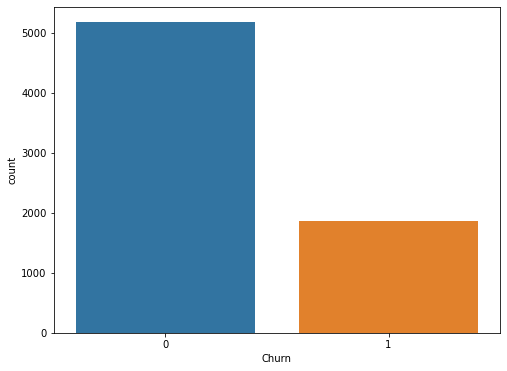

In [101]:
# Churn data
plt.figure(figsize=(8,6))
sns.countplot(df.Churn, data=df)

In [102]:
#Counting the value of churn
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

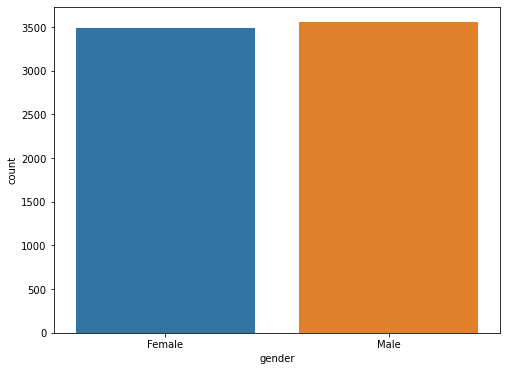

In [103]:
# Gender 
plt.figure(figsize=(8,6))
sns.countplot(df.gender, data=df)

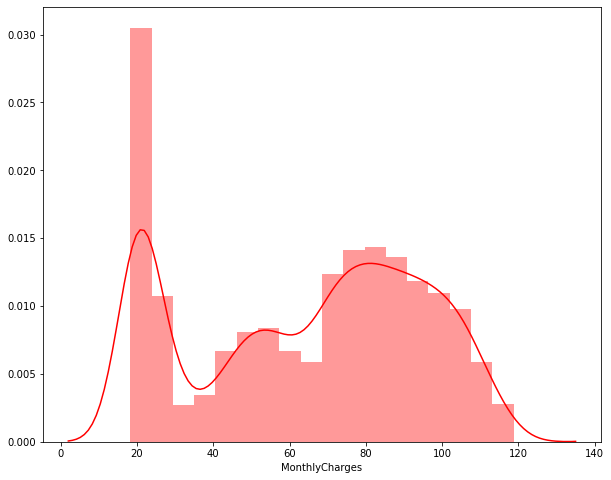

In [104]:
# Monthly charges
plt.figure(figsize=(10,8))
sns.distplot(df.MonthlyCharges, color= 'red')

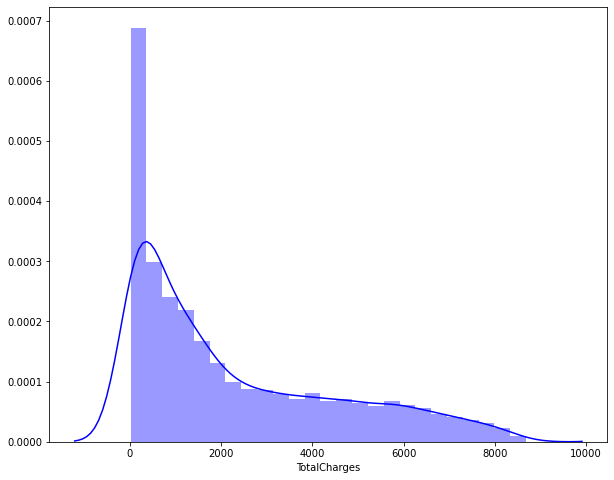

In [105]:
# Total charges
# As total chages is in string format we need to convert into numerical form
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
plt.figure(figsize=(10,8))
sns.distplot(df.TotalCharges, color='blue')

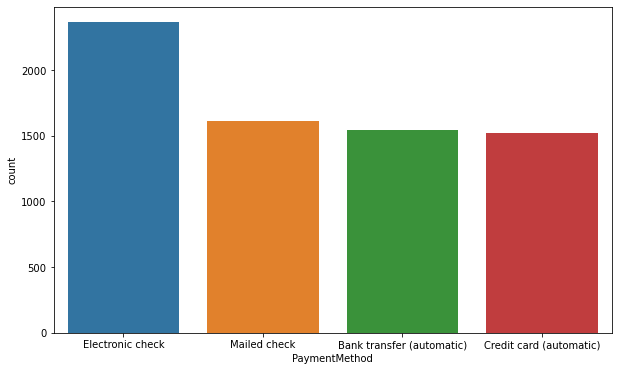

In [106]:
# Paymet methods
plt.figure(figsize=(10,6))
sns.countplot(df.PaymentMethod)

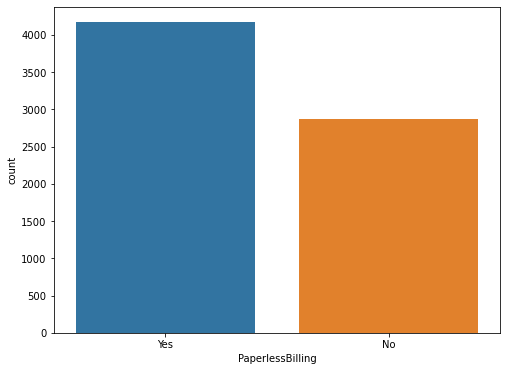

In [107]:
# paper billing
plt.figure(figsize=(8,6))
sns.countplot(df.PaperlessBilling)

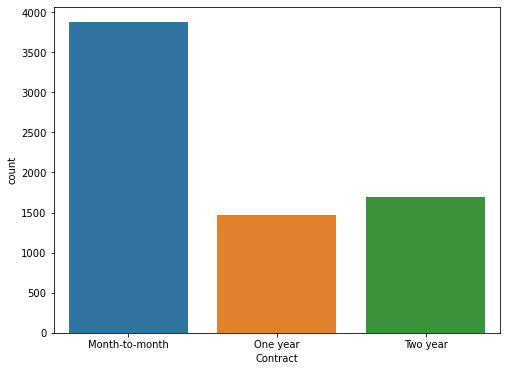

In [108]:
#Contract
plt.figure(figsize=(8,6))
sns.countplot(df.Contract)

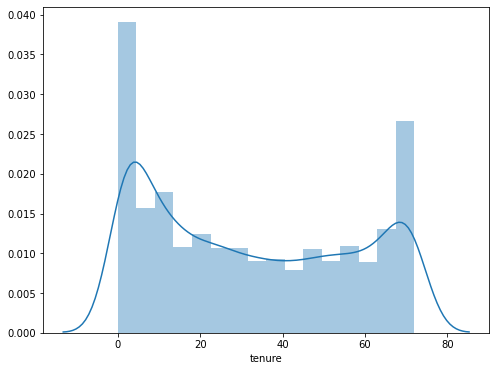

In [109]:
#Tenure
plt.figure(figsize=(8,6))
sns.distplot(df.tenure)

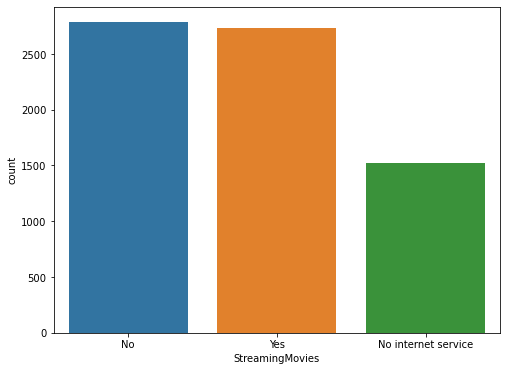

In [110]:
#streaming movie
plt.figure(figsize=(8,6))
sns.countplot(df.StreamingMovies)

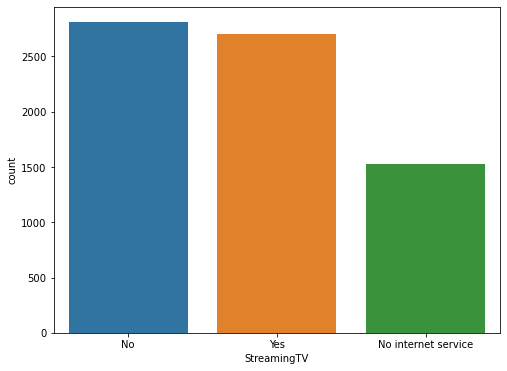

In [111]:
#streaming tv
plt.figure(figsize=(8,6))
sns.countplot(df.StreamingTV)

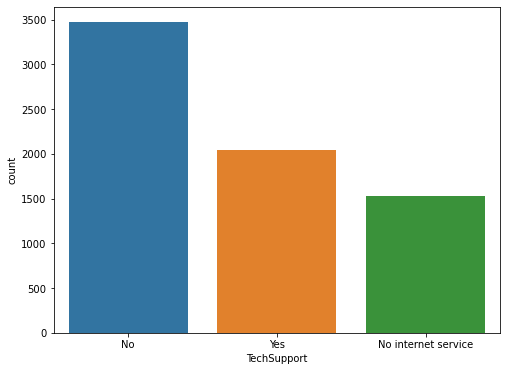

In [112]:
#Tech support
plt.figure(figsize=(8,6))
sns.countplot(df.TechSupport)

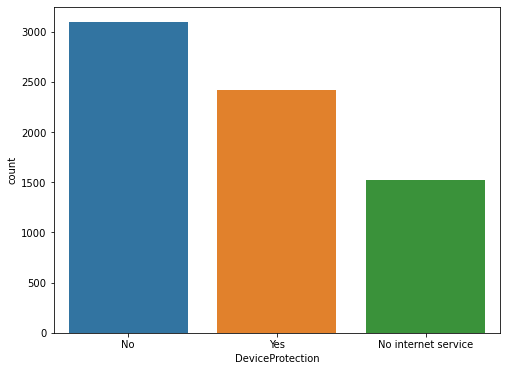

In [113]:
#DeviceProtection
plt.figure(figsize=(8,6))
sns.countplot(df.DeviceProtection)

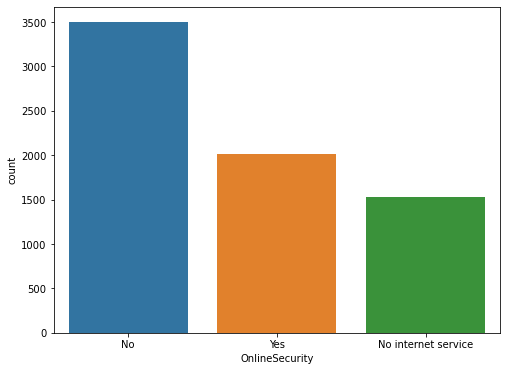

In [114]:
#OnlineSecurity
plt.figure(figsize=(8,6))
sns.countplot(df.OnlineSecurity)

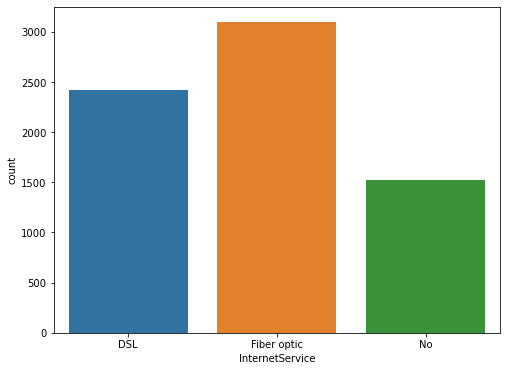

In [115]:
#InternetService
plt.figure(figsize=(8,6))
sns.countplot(df.InternetService)

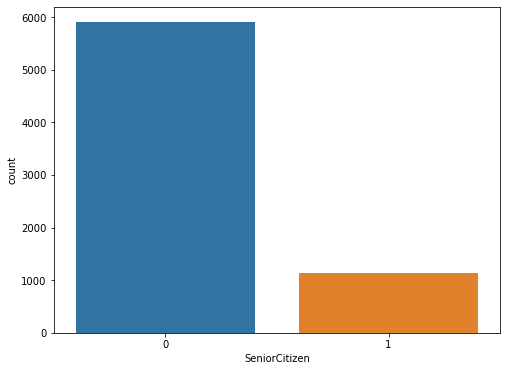

In [116]:
#MultipleLinest
plt.figure(figsize=(8,6))
sns.countplot(df.SeniorCitizen)

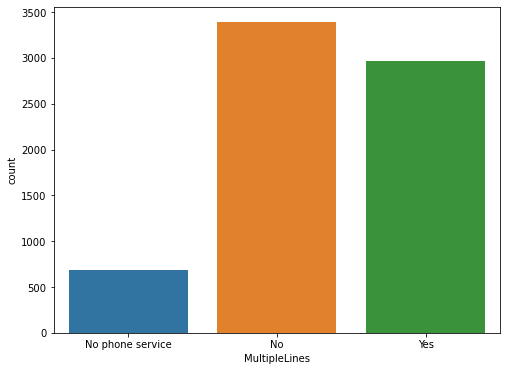

In [117]:
#MultipleLinest
plt.figure(figsize=(8,6))
sns.countplot(df.MultipleLines)

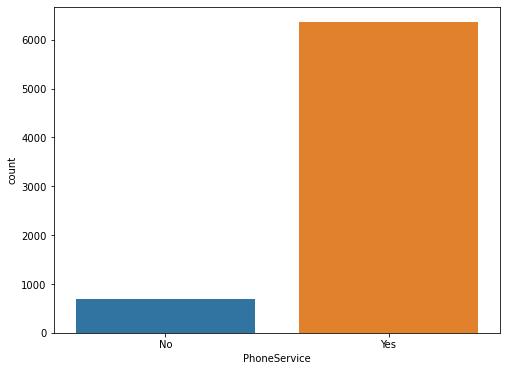

In [118]:
#PhoneService
plt.figure(figsize=(8,6))
sns.countplot(df.PhoneService)

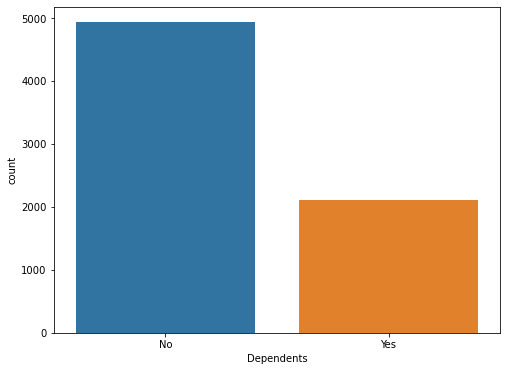

In [119]:
#Dependents
plt.figure(figsize=(8,6))
sns.countplot(df.Dependents)

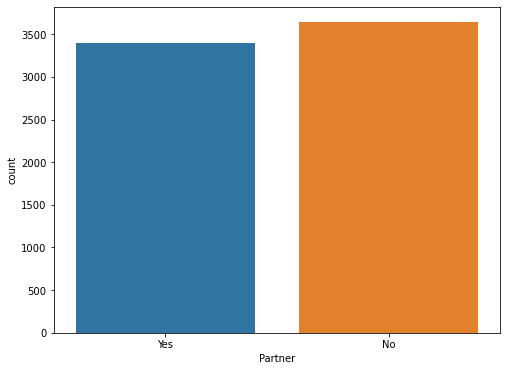

In [120]:
#Patners
plt.figure(figsize=(8,6))
sns.countplot(df.Partner)

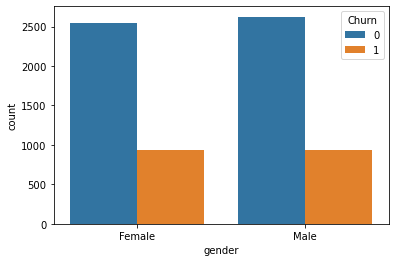

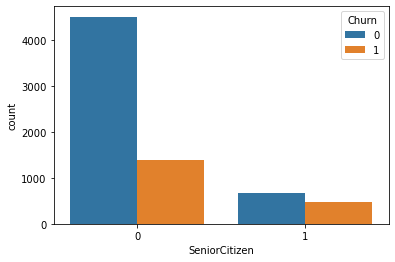

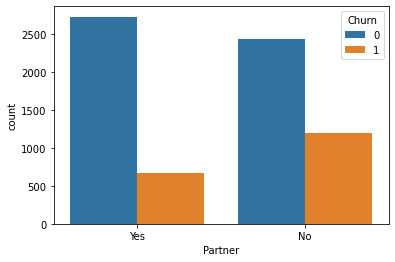

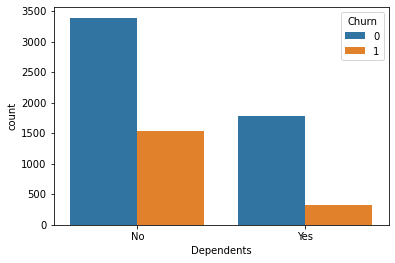

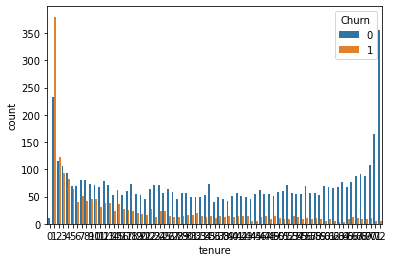

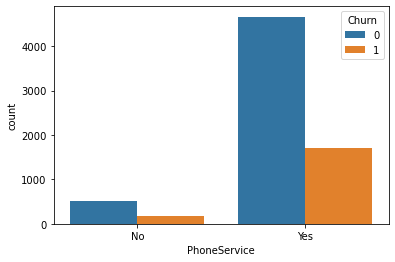

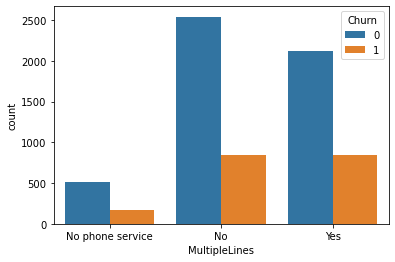

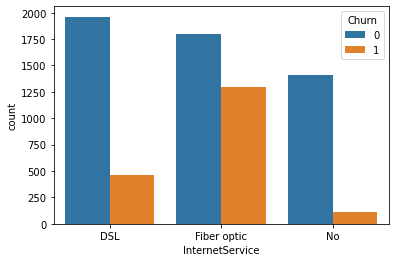

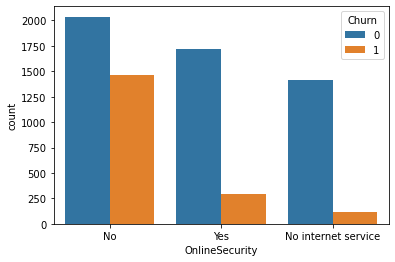

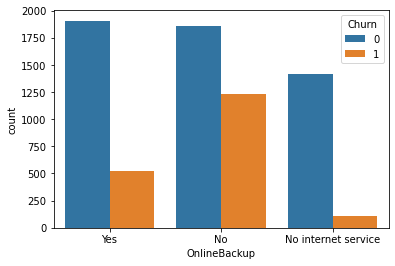

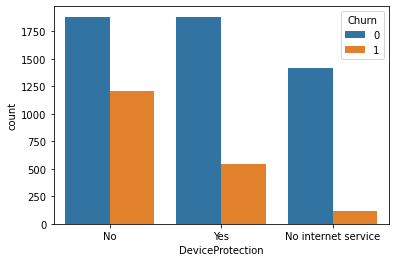

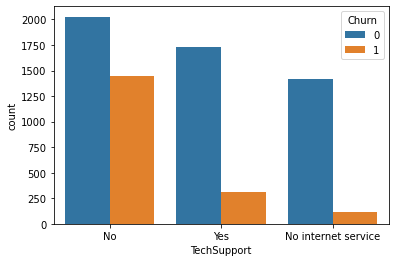

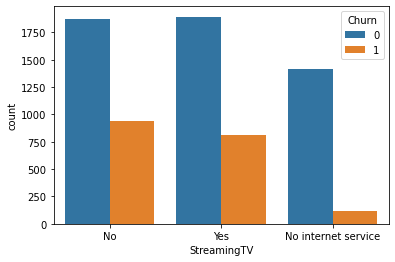

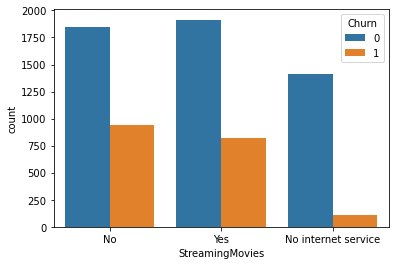

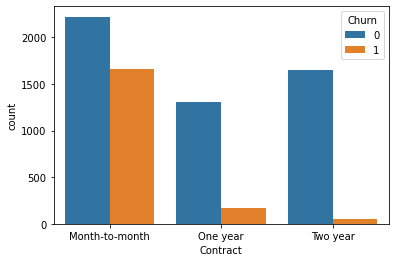

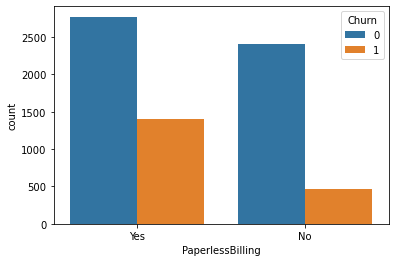

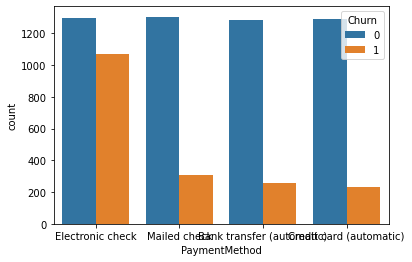

In [121]:
#Univariate analysis with churn

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','customerID'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

    


# Bivariate analysis

In [122]:
#Drop the custoer id column
df=df.drop('customerID', axis=1)

In [123]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


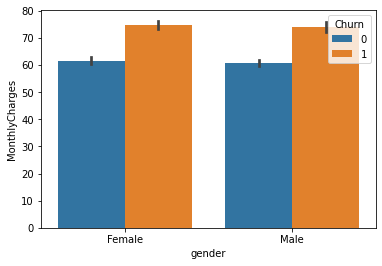

In [124]:
# gender and Monthly charges with churn
sns.barplot(x='gender',y='MonthlyCharges', hue='Churn',data=df)

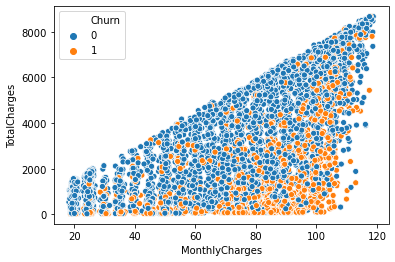

In [125]:
# Monthly charges and totally charges with churn
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=df)

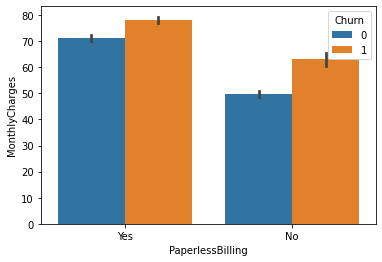

In [126]:
# Paperlessbilling and monthlychargeswith churn
sns.barplot(x='PaperlessBilling',y='MonthlyCharges',hue='Churn', data=df)

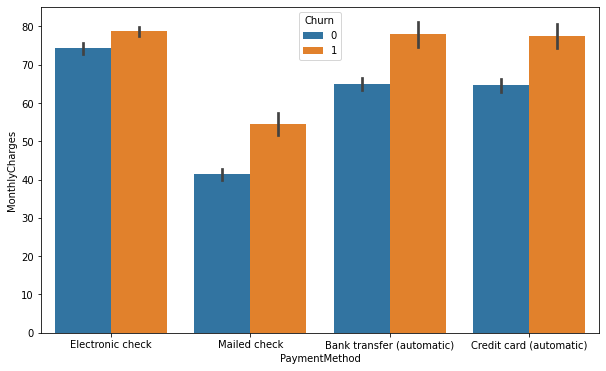

In [127]:
# Paperlessbilling and monthlychargeswith churn
plt.figure(figsize=(10,6))
sns.barplot(x='PaymentMethod',y='MonthlyCharges',hue='Churn', data=df)

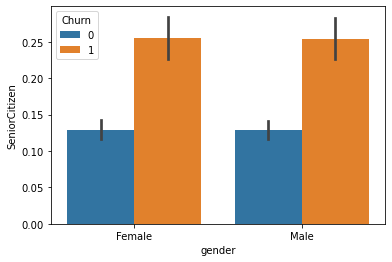

In [128]:
#Senior citizen with gender churning
sns.barplot(x='gender', y='SeniorCitizen',data=df,hue='Churn')

In [129]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000


# Label encoding

In [130]:
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()
cat_col=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [131]:
# Correlation between the variable
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102411,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.319072,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064653,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825880,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113008,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.453202,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175691,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254473,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375556,-0.195525


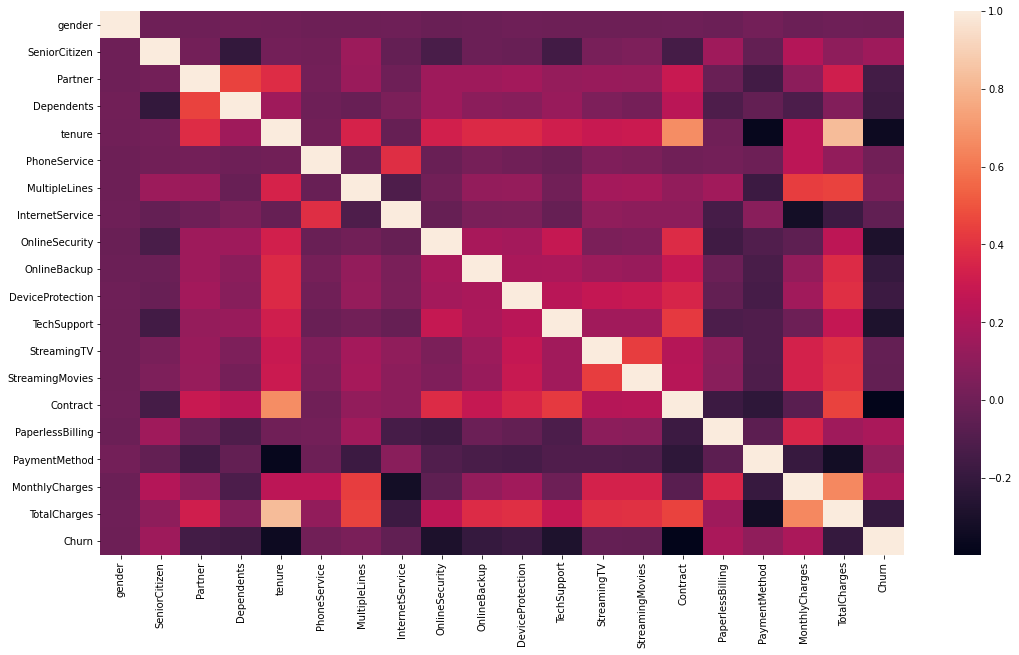

In [132]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr())



# One hot Encoding

In [133]:
df=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,1,0,1,0,2,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,2,0,2,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,2,2,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,2,0,2,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [134]:
# Correlation between the variables
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.015017,-0.012057,0.000549,...,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.128221,-0.013632,-0.021398,...,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.150828,0.153130,0.166330,...,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.152166,0.091015,0.080537,...,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,0.325468,0.370876,0.371105,...,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,-0.015198,0.024105,0.003727,...,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,0.007141,0.117327,0.122318,...,-0.067124,0.290801,-0.272964,-0.091619,-0.003080,0.109549,0.076293,0.064939,0.086121,-0.235566
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,1.000000,0.185126,0.175985,...,0.155558,-0.255478,0.128453,-0.364245,0.123571,0.306317,0.099084,0.122220,-0.254689,0.068992
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.185126,1.000000,0.187757,...,-0.007633,-0.039106,0.055914,-0.279679,0.108224,0.222507,0.092990,0.098545,-0.133810,-0.037698
DeviceProtection,0.000549,-0.021398,0.166330,0.080537,0.371105,0.003727,0.122318,0.175985,0.187757,1.000000,...,-0.020269,-0.028012,0.057116,-0.346016,0.128457,0.280455,0.088749,0.120927,-0.137020,-0.051840


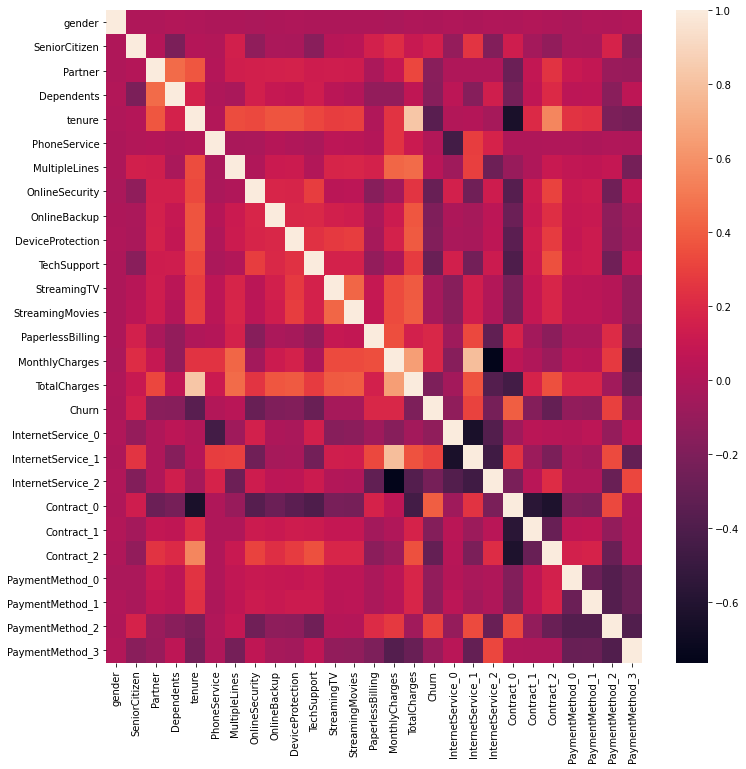

In [135]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

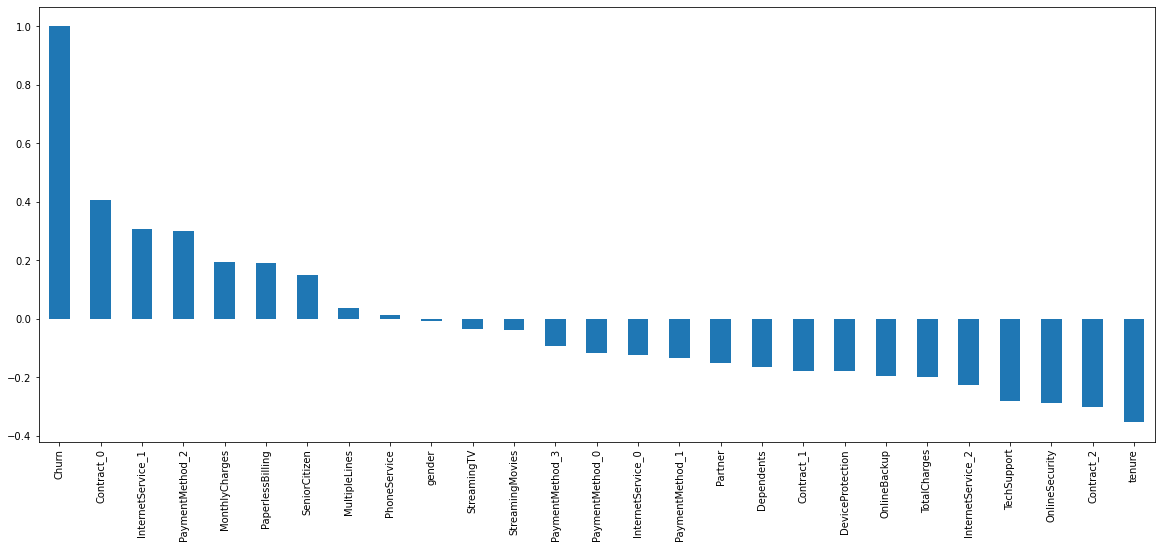

In [136]:
# Correlation with churn
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

# Training the model

In [137]:
#Input split
x=df.drop('Churn',axis=1)

In [138]:
y=df['Churn']

In [139]:
x=x.fillna(x.mean())


In [140]:
#As there is sum null values in Total charges 
df=df.fillna(df['TotalCharges']).mean()

In [141]:
#Spliting the data into traina nd test data
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0 )
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
np.isfinite(x_train).all()


gender               True
SeniorCitizen        True
Partner              True
Dependents           True
tenure               True
PhoneService         True
MultipleLines        True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
PaperlessBilling     True
MonthlyCharges       True
TotalCharges         True
InternetService_0    True
InternetService_1    True
InternetService_2    True
Contract_0           True
Contract_1           True
Contract_2           True
PaymentMethod_0      True
PaymentMethod_1      True
PaymentMethod_2      True
PaymentMethod_3      True
dtype: bool

In [142]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\47 NO SAHARPUR LPS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [143]:
pred= log_model.predict(x_test)

In [144]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [145]:
dt  = round(accuracy_score(y_test, pred)*100, 2)
print(dt) 

79.84


In [146]:
# Displaying the confusion_matrix to see how the model performed
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,pred)
conf

array([[932, 109],
       [175, 193]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

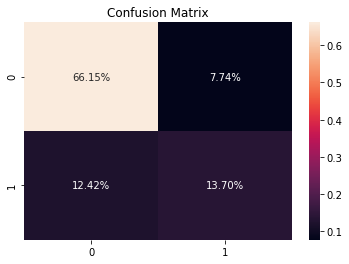

In [147]:
sns.heatmap(conf/np.sum(conf), annot=True,fmt='0.2%')
plt.title('Confusion Matrix')

